checking to see if a 2D histogram helps with visualizing the effects of different features

In [1]:
class patient:
    def __init__(self, filepath, input_fileName, lengthPtID):
        ptID = input_fileName[:lengthPtID]
        self.ptID = ptID
        self.fileName = input_fileName
        #find the demographics in one of two sheets
        # directory = os.getcwd()
        file_adds = filepath + '/' + input_fileName
        file = pd.ExcelFile(file_adds)
        sheet_Names = file.sheet_names
        if 'Cancer_Registery Data' in sheet_Names:
            #do the thing for getting patient info
            df = pd.read_excel(input_fileName, sheet_name= 'Cancer_Registery Data')
            self.ptDemographics = df
            self.amyloid_status = df.at[0,"Amyloid Status"]
            self.survival = df.at[0,"Survival Time (Months)"]
            self.ageDx = df.at[0,"Age At Diagnosis"] 
            self.sex = df.at[0,"Gender Cancer Registry"]
            self.vitalStatus = df.at[0, "Vital Status Cancer Registry"]
            self.dx = df.at[0, "Histology"]

        elif '30 Cerner Patients ' in sheet_Names:
            #do the thing for getting patient info
            df = pd.read_excel(input_fileName, sheet_name= '30 Cerner Patients ')
            self.ptDemographics = df
            self.amyloid_status = df.at[0,"Amyloid Status"]
            self.survival = df.at[0,"Survival Time (months)"]
            self.ageDx = df.at[0,"Age At Diagnosis"] 
            self.sex = df.at[0,"Gender Cerner"]
            self.vitalStatus = df.at[0, "Vital Status (Cerner)"]
            self.dx = df.at[0, "Primary Site"]


        else: print("no patient identifying information")

        #now iterate through the list of sheets to import the patient data 
        if 'Labs' in sheet_Names:
            self.labsData = pd.read_excel(input_fileName, sheet_name= 'Labs')
        else: self.labsData = False
        
        if 'amyloid in subject' in sheet_Names:
            self.echoData = pd.read_excel(input_fileName, sheet_name= 'amyloid in subject')
        else: self.echoData = False

        if 'ChemoTx' in sheet_Names:
            self.ChemoTx = pd.read_excel(input_fileName, sheet_name= 'ChemoTx')
        else: self.ChemoTx = False

        if 'Hematologic Tx' in sheet_Names:
            self.HemeTx = pd.read_excel(input_fileName, sheet_name= 'Hematologic Tx')
        else: self.HemeTx = False

        if 'Immuno Tx' in sheet_Names:
            self.ImmunoTx = pd.read_excel(input_fileName, sheet_name= 'Immuno Tx')
        else: self.ImmunoTx = False

        if 'Radiation Tx' in sheet_Names:
            self.RadTx = pd.read_excel(input_fileName, sheet_name= 'Radiation Tx')
        else: self.RadTx = False

        if 'Other Tx' in sheet_Names:
            self.OtherTx = pd.read_excel(input_fileName, sheet_name = 'Other Tx')
        else: self.OtherTx = False

        if 'Physican_Notes' in sheet_Names:
            self.MDnotes = pd.read_excel(input_fileName, sheet_name= 'Physican_Notes')
        else: self.MDnotes = False

        #to create a callable list of treatments recieved for which we have data
        tx_sheets = ['ChemoTx', 'Hematologic Tx', 'Immuno Tx']
        treatmentTypesRecieved = []

        for possible in tx_sheets:
        
            if possible in sheet_Names:
                treatmentTypesRecieved.append(possible)
        self.txRecieved = treatmentTypesRecieved

def FilterList(list, keyWords_primary, keyWords_secondary = ["Empty"], omit = ["Empty"]):
    #store the filtered result
    filteredList = []

    if keyWords_secondary == ["Empty"]:
        for c in list: #loop the columns
            for buzz in keyWords_primary: #loop the key words
                if buzz in c: #if the column contains the key word
                    filteredList.append(c) #add the column to the list
                    break #do not continue testing primary key words for this column
    
    else: 
        for c in list: #loop the columns
            for buzz in keyWords_primary: #loop the key words
                if buzz in c: #if the column contains the key word
                    for secondary in keyWords_secondary:
                        if secondary in c:
                            filteredList.append(c) #add the column to the list
                            break #has been added to list based on passing the seondary 
                        else:
                            pass
                    break #do not continue to check primary key words for this column
                else:
                    pass
                
    if omit != ["Empty"]: 
        for x in omit: 
            for a in filteredList:
                if x in a:
                    filteredList.remove(a)
    
    #by iterating through the column names first, we keep the order of the columns

    return filteredList 

#createBinary function
#createBinary function
def createBinary(df, listOfLabs, timeColumn): 
    #list of labs needs to match exactly.  
    # Filter the dataframe before inputting
    #for boolean
    df_toBool = df[listOfLabs]
    df_bool = df_toBool.notna()
    df_asint = df_bool.astype(int)
    #add column back for time 
    df_asint.insert(0, timeColumn, df[timeColumn])
    return df_asint

def createBinarySum(df, listOfLabs, timeColumn, defaxis):
    #list of labs needs to match exactly.  
    # Filter the dataframe before inputting
    #for boolean
    df_toBool = df[listOfLabs]
    df_bool = df_toBool.notna()
    df_asint = df_bool.astype(int)
    #add column back for time 
    # df_asint.insert(0, timeColumn, df[timeColumn])
    #sum across the row
    #defaxis = 0 means the columns are preserved 
    #defaxis =1 means the rows are preserved
    df_new_sum = df_asint.sum(axis = defaxis)
    return df_new_sum

#get list of patients from directory 
def GetListOfPatientsFromDirectory (directory, fileExtension, fileCommon, lengthID):
    #get the directory 
    listFileNames = os.listdir(directory)
    outputList = []
    #loop through list of fileNames: 
    for file in listFileNames:
        #id if the file is patient data
        if fileCommon in file and file.endswith(fileExtension):
            #trim the file name to the pt ID
            ptID = file[:lengthID]
            outputList.append(ptID)
    return outputList

def GetListofPTfiles(directory, fileExtension, fileCommon):
    listFileNames = os.listdir(directory)
    outListFiles = []
    #loop through file names
    for file in listFileNames:
        if fileCommon in file and file.endswith(fileExtension):
            outListFiles.append(file)
    return outListFiles

def getNormalValue(filteredDataColumn, skipValue = 6666):
    test = filteredDataColumn
    #input is a series
    
    for entry in test:
        if entry != skipValue:
            outputValue = entry
                # print("this is output: ", outputValue)
                #set x to True
            break
        else:
            # print("entry is blank")
            pass
    return outputValue

#get amyloid status dictionary inputs, sort ptIDs to lists based on amyloid status 
def getListSortedByAmyloid(amyloidDictionary, listPositive, listNegative, listOther,
                           statusPositive = "yes", statusNegative = "no"):
    for pt in amyloidDictionary.keys():
        status = amyloidDictionary[pt]
        if status == statusPositive:
            listPositive.append(pt)
        elif status == statusNegative:
            listNegative.append(pt)
        else:
            listOther.append(pt)
    #does not check for double listed patient IDs

#function for masking a dataframe 
def patientSectionOfFrame(start_frame, sheet_name, column_toMask, ptID):
    #ptID is a row parameter in the column_toMask
    df_use = start_frame #copy of the frame

    #first check if sheet has the column of interest
    data_top = list(start_frame.columns) #returns the headers as a list

    #determine of the sheet contains the column of interest
    if data_top.count(column_toMask) > 0: 
        #if true, now find if the patient is present
        searchForPt = start_frame[column_toMask].str.startswith(ptID).sum() #returns the number of instances of the patient
        if searchForPt > 0:
            #patient is present 
            #mask the data for the patient
            df_clean = df_use.dropna(subset= [column_toMask]) #removing NA 
            mask = df_clean[column_toMask].str.startswith(ptID) #masking for the rows where the patient has data
            df_sub_tosave = df_clean[mask] #output dataframe filtered for the patient
            return df_sub_tosave
        else:
            #the patient isn't present
            # return print("The patient " + ptID + " is not in " + sheet_name)
            pass
    else:
        #the column of interest isn't present
        # return print("The column " + column_toMask + " is not in the sheet " + sheet_name)
        pass

#make folder path for data
def makeFolderPathForData(parent_dir, folderName_header, folderName_common, folderName_suffix):
    #makes a new directory for your files
    #returns the folder name for use in other functions
    folderName = folderName_header + folderName_common + folderName_suffix
    path = os.path.join(parent_dir,folderName)
    if not os.path.exists(path):
        os.mkdir(path)
    return folderName

#to excel function
def outputToExcel(df_data, fileName_header, fileName_Common, fileName_suffix,
                  parent_dir, folderName, sheetName):
    fileName = fileName_header + fileName_Common + fileName_suffix
    outfile_extension = '.xlsx'
    outfile_boxplts = fileName + outfile_extension
    path_out= os.path.join(parent_dir, folderName, outfile_boxplts)

    if os.path.exists(path_out):
            #if old sheet
            with pd.ExcelWriter(path_out, mode = 'a', if_sheet_exists = 'overlay') as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True)
    else: 
            #new sheet
            with pd.ExcelWriter(path_out) as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True) #if new sheet

def outputFiguresPath(fileName_header, fileName_mid, fileName_suff, parent_dir, folderName):
        fileName_header = str(fileName_header)
        fileName_mid = str(fileName_mid)
        fileName_suff = str(fileName_suff)

        #cleaning the input to prevent addition of / to the directory
        fileName_header = fileName_header.replace("/", "-")
        fileName_mid = fileName_mid.replace("/", "-")
        fileName_suff = fileName_suff.replace("/", "-")

        fileName = fileName_header + fileName_mid +fileName_suff
        out_filename = fileName + '.tif'
        new_filepath = os.path.join(parent_dir, folderName, out_filename)
        #the output path can be used to save the figure
        return new_filepath
        # plt.savefig(new_filepath, bbox_inches = 'tight')

In [2]:
#libraries and functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

In [3]:
#make folder path for data
def makeFolderPathForData(parent_dir, folderName_header, folderName_common, folderName_suffix):
    #makes a new directory for your files
    #returns the folder name for use in other functions
    folderName = folderName_header + folderName_common + folderName_suffix
    path = os.path.join(parent_dir,folderName)
    if not os.path.exists(path):
        os.mkdir(path)
    return folderName

#to excel function
def outputToExcel(df_data, fileName_header, fileName_Common, fileName_suffix,
                  parent_dir, folderName, sheetName):
    fileName = fileName_header + fileName_Common + fileName_suffix
    outfile_extension = '.xlsx'
    outfile_boxplts = fileName + outfile_extension
    path_out= os.path.join(parent_dir, folderName, outfile_boxplts)

    if os.path.exists(path_out):
            #if old sheet
            with pd.ExcelWriter(path_out, mode = 'a', if_sheet_exists = 'overlay') as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True)
    else: 
            #new sheet
            with pd.ExcelWriter(path_out) as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True) #if new sheet

def outputFiguresPath(fileName_header, fileName_mid, fileName_suff, parent_dir, folderName):
        fileName_header = str(fileName_header)
        fileName_mid = str(fileName_mid)
        fileName_suff = str(fileName_suff)

        #cleaning the input to prevent addition of / to the directory
        fileName_header = fileName_header.replace("/", "-")
        fileName_mid = fileName_mid.replace("/", "-")
        fileName_suff = fileName_suff.replace("/", "-")

        fileName = fileName_header + fileName_mid +fileName_suff
        out_filename = fileName + '.tif'
        new_filepath = os.path.join(parent_dir, folderName, out_filename)
        #the output path can be used to save the figure
        return new_filepath
        # plt.savefig(new_filepath, bbox_inches = 'tight')

In [4]:
#directory management
#updates to directory management
machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
# machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '013 Analyzed Data outputs' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

parent_dir = path

folderNameHeader = "FeatHistograms"
folderNameCommon = '_top60E_descOnly'
folderNameSuffix = "_2024-09-04_v1"

fileNameHeader = "FeatHistograms"
fileNameCommon = '_top60E_descOnly'
fileNameSuffix = "_2024-09-04_v1"

folder_data_out = makeFolderPathForData(parent_dir=parent_dir, folderName_header=folderNameHeader,
                                        folderName_common=folderNameCommon, folderName_suffix=folderNameSuffix)
# outputToExcel(*, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, 
#               fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= *)

# fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=**, 
#                                  fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)

# data from SVM

In [36]:
#import data from DF for SVM
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '012 Processed Data' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory, "DFsForSVM_top60E_descOnly__2024-09-03_v1")

parent_dir = path
os.chdir(parent_dir)

#importing features used in SVM
# "DFsForSVM_top60E_descOnly__2024-09-03_v1\AL-KnownPts_top60E_descOnly__1Sheet_2024-09-03_v1.xlsx"
model_features = pd.read_excel("AL-KnownPts_top60E_descOnly__1Sheet_2024-09-03_v1.xlsx", sheet_name = "ALL", header = [0])
features_across_models= model_features



storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '013 Analyzed Data outputs' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

parent_dir = path

In [38]:
#reindex the dataframe
new_index = [x for x in model_features["DeID"]]

model_features.index = new_index

# raw data


In [8]:
project_lv2_directory = '012 Processed Data/data-2024-06-05' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

new_dirrectory = path
os.chdir(new_dirrectory)

In [9]:
#importing patient data as dictionaries of dataframes
ptID_test = "E-01"

#build a dictionary of patients and their values 
ptFiles = GetListofPTfiles(new_dirrectory, '.xlsx', 'data')

patientDictAmyloid = {}
patientDictSurvival = {}
patientDictLabs = {}
patientDictEcho = {}
patientDictNotes = {}
patientDictDx = {}
patientDictVitalStatus = {}
patientDictSex = {}
patientDictAge = {}
patientDictChemo = {}
patientDictImmuno = {}
patientDictHeme = {}
patientDictRad = {}
patientDictOther = {}

#loop through the listOfPatients 
for file in ptFiles: 
    pt = patient(new_dirrectory, file, 4)
    patientDictAmyloid[pt.ptID] = pt.amyloid_status
    patientDictSurvival[pt.ptID] = pt.survival
    patientDictLabs[pt.ptID] = pt.labsData
    patientDictEcho[pt.ptID] = pt.echoData
    patientDictNotes[pt.ptID] = pt.MDnotes
    patientDictDx[pt.ptID] = pt.dx
    patientDictVitalStatus[pt.ptID] = pt.vitalStatus
    patientDictSex[pt.ptID] = pt.sex
    patientDictAge[pt.ptID] = pt.ageDx
    patientDictChemo[pt.ptID] = pt.ChemoTx
    patientDictImmuno[pt.ptID] = pt.ImmunoTx
    patientDictHeme[pt.ptID] = pt.HemeTx
    patientDictRad[pt.ptID] = pt.RadTx
    patientDictOther[pt.ptID] = pt.OtherTx
    

#calling patient to test 
ptLabsTest = patientDictLabs[ptID_test]

In [10]:
#sort the patient list by amyloid status

listPositive = []
listNegative = []
listOther = []

getListSortedByAmyloid(patientDictAmyloid, listPositive= listPositive,
                       listNegative=listNegative, listOther=listOther)

#first make a copy of the list
listALKnown = listPositive.copy()
#add the negative patients to the list of positive patients
listALKnown.extend(listNegative) 

# Segment data

In [11]:
#list of features to plot: 

In [104]:
list_features = [x for x in model_features.columns]
list_features = list_features[6:]

In [105]:
model_features_positive = model_features.loc[listPositive]
model_features_negative = model_features.loc[listNegative]

In [121]:
#features selected by the model
features_selected = ["Creatinine Result(mg/dL) Desc 25%",
                    "Kappa Free Light Chains Result (mg/L) Desc min", 
                    "Pct. Eosinophil Result Desc 25%",
                    "Pct. Nucleated RBC/100 WBC Result Desc max", 
                    "Sodium Result(mmol/L) Desc 75%",
                    "NT Pro BNP (B-Type Natriuretic Peptide) Desc count"
                    ]

# Plot histograms

In [106]:
#plot features
alpha = 0.5
color_positive = "red"
color_negative = "blue"

In [107]:
# #Plots histograms
# i = 0
# for feature in list_features: 
#     fig, ax = plt.subplots()
#     ax.hist(model_features_positive[feature], color = color_positive, alpha = alpha)
#     ax.hist(model_features_negative[feature], color = color_negative, alpha = alpha)
#     amyloidpositive_patch = mpatches.Patch(color = color_positive, alpha = alpha, label = "Amyloid Positive")
#     amyloidnegative_patch = mpatches.Patch(color = color_negative, alpha = alpha, label = "Amyloid Negative")
#     ax.legend(handles = [amyloidpositive_patch, amyloidnegative_patch])
#     fig.suptitle(feature + " by Amyloid status")

#     # figCommon = fileNameCommon + "_histogram_"
#     # fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=figCommon, 
#     #                              fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
#     # fig.savefig(fig_file_out, bbox_inches = 'tight')
#     i = i+1

In [108]:
#dimensions for the multiple plots in one figure 
rows_for_fig = 8
cols_for_fig = 8
number_of_figs_in_plot = rows_for_fig*cols_for_fig
positions = [(i // cols_for_fig, i % cols_for_fig) for i in range(rows_for_fig * cols_for_fig)]

columnsForFigure = list_features
#slice the list of columns in groups 

slices_sorted = [columnsForFigure[i:i + number_of_figs_in_plot] for i in range(0, len(columnsForFigure), number_of_figs_in_plot)] 

In [ ]:
#Plots histograms
i = 0
for feature in features_selected: 
    fig, ax = plt.subplots()
    ax.hist(model_features_positive[feature], color = color_positive, alpha = alpha)
    ax.hist(model_features_negative[feature], color = color_negative, alpha = alpha)
    amyloidpositive_patch = mpatches.Patch(color = color_positive, alpha = alpha, label = "Amyloid Positive")
    amyloidnegative_patch = mpatches.Patch(color = color_negative, alpha = alpha, label = "Amyloid Negative")
    ax.legend(handles = [amyloidpositive_patch, amyloidnegative_patch])
    fig.suptitle(feature + " by Amyloid status")

    figCommon = fileNameCommon + "_histo_" + str(i) +"_"
    fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=figCommon, 
                                 fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
    fig.savefig(fig_file_out, bbox_inches = 'tight')
    i = i+1

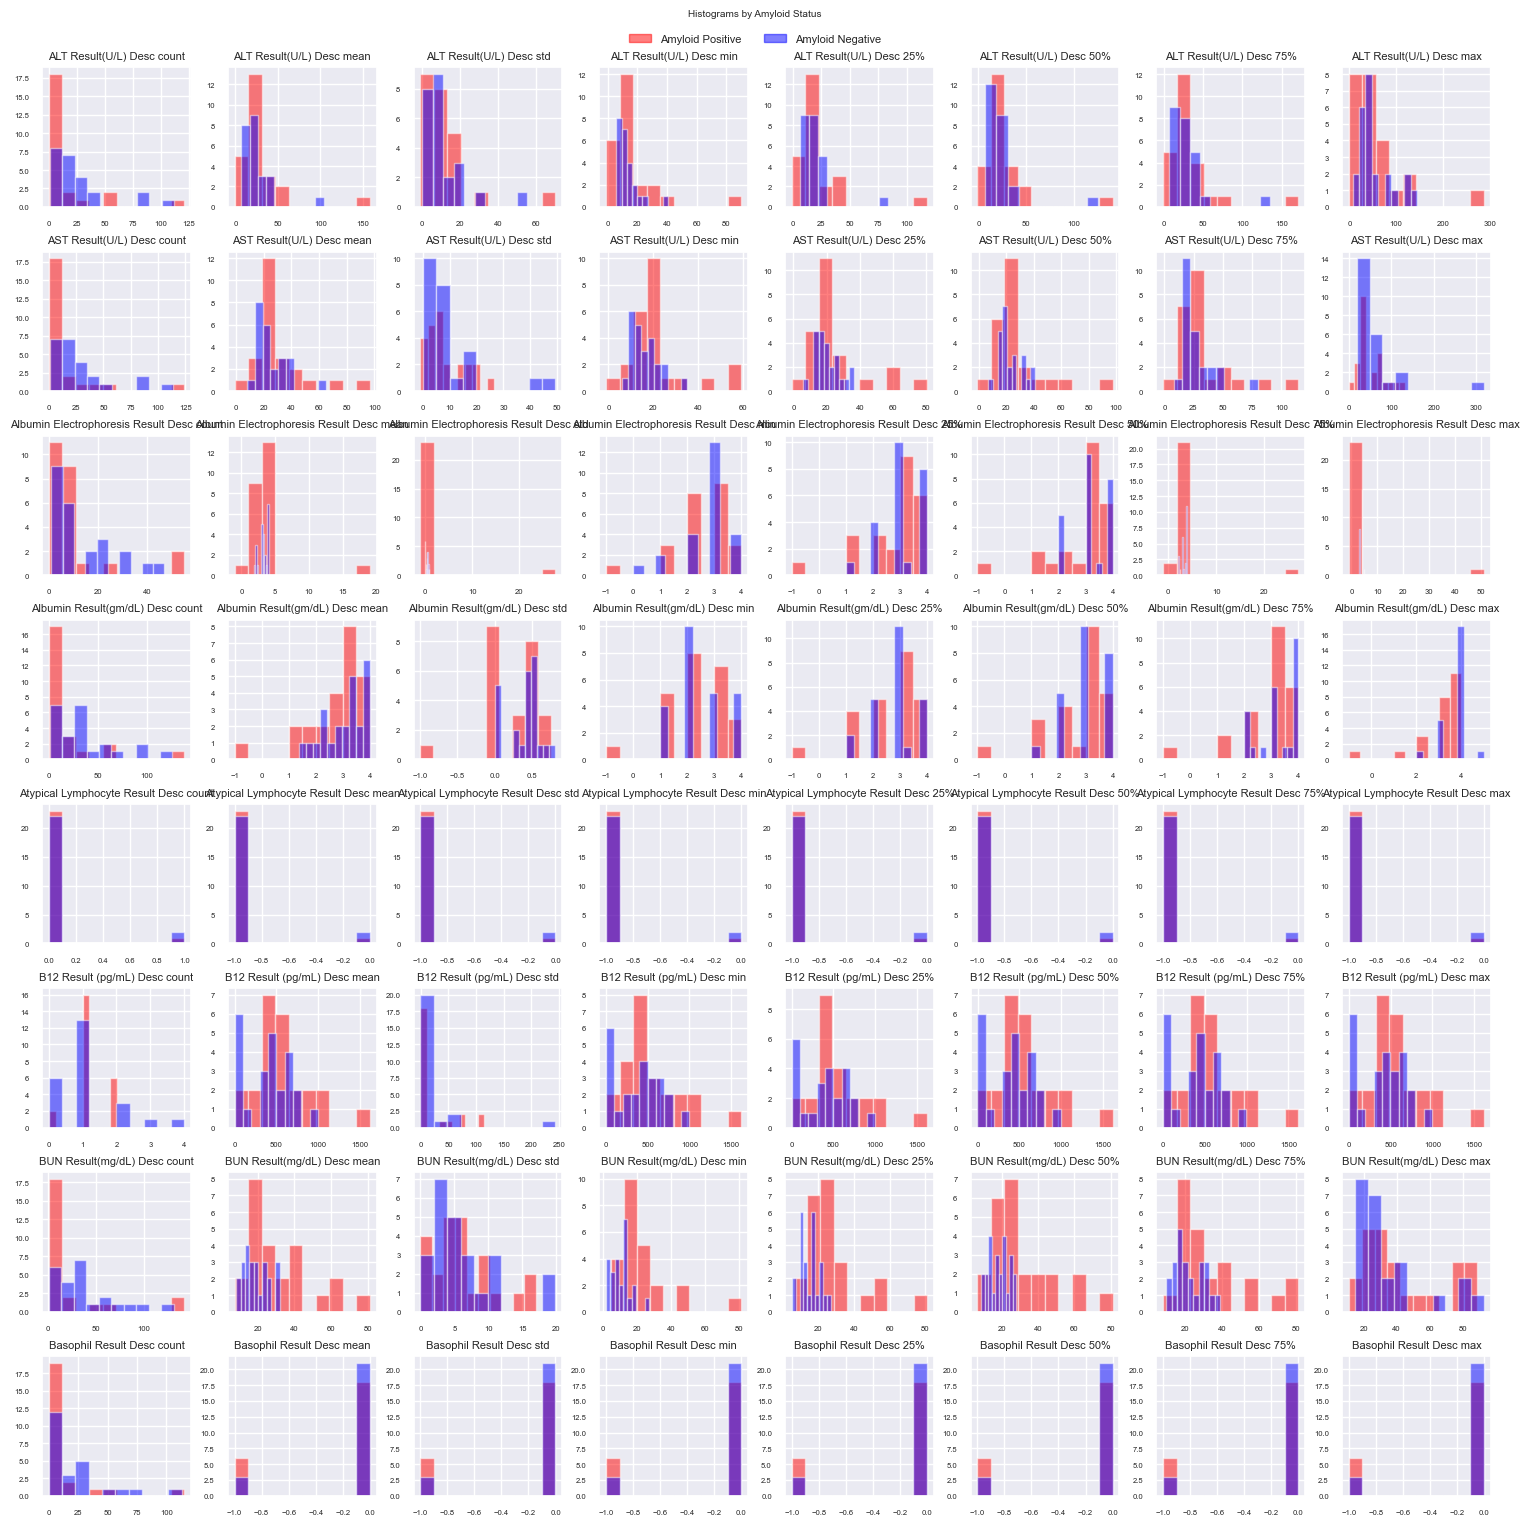

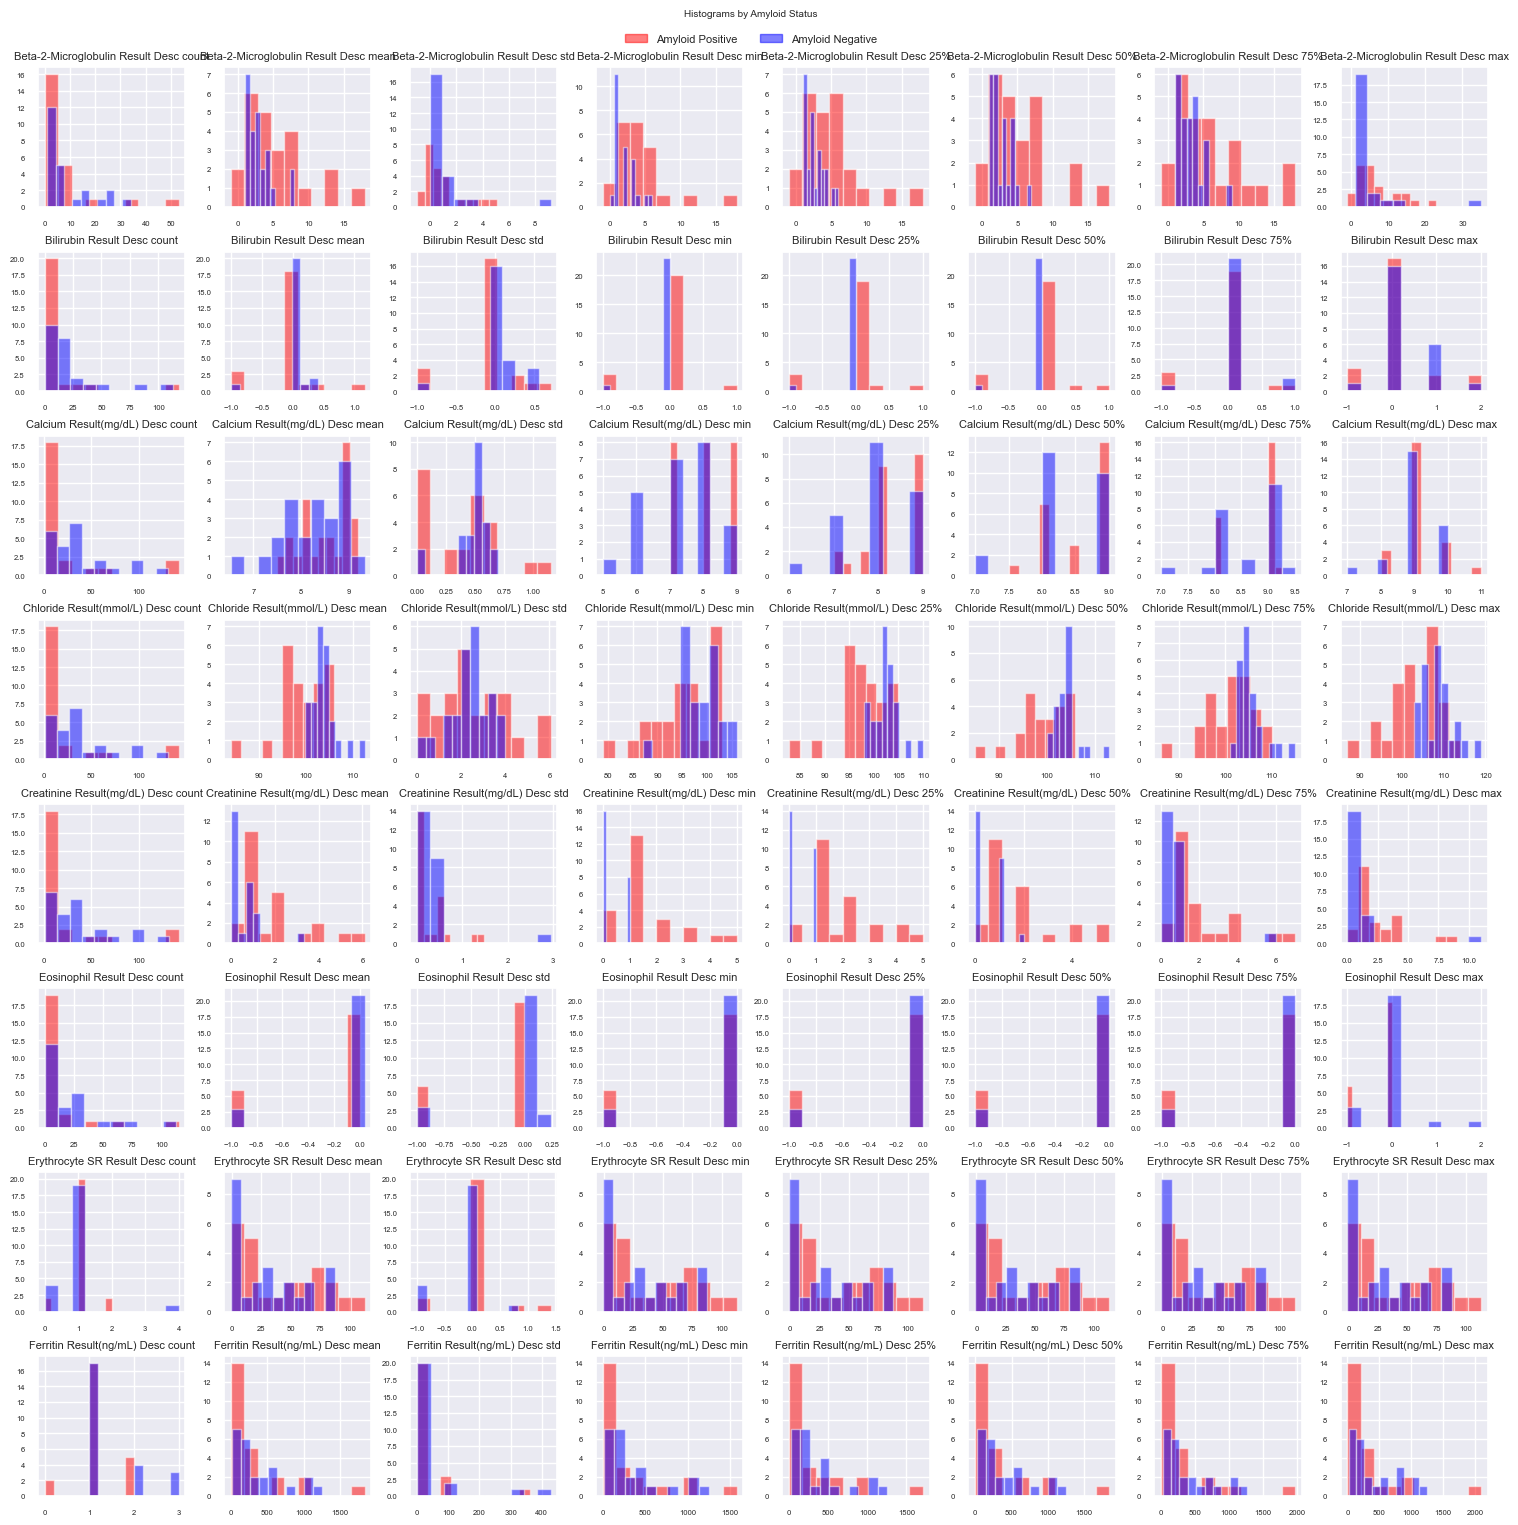

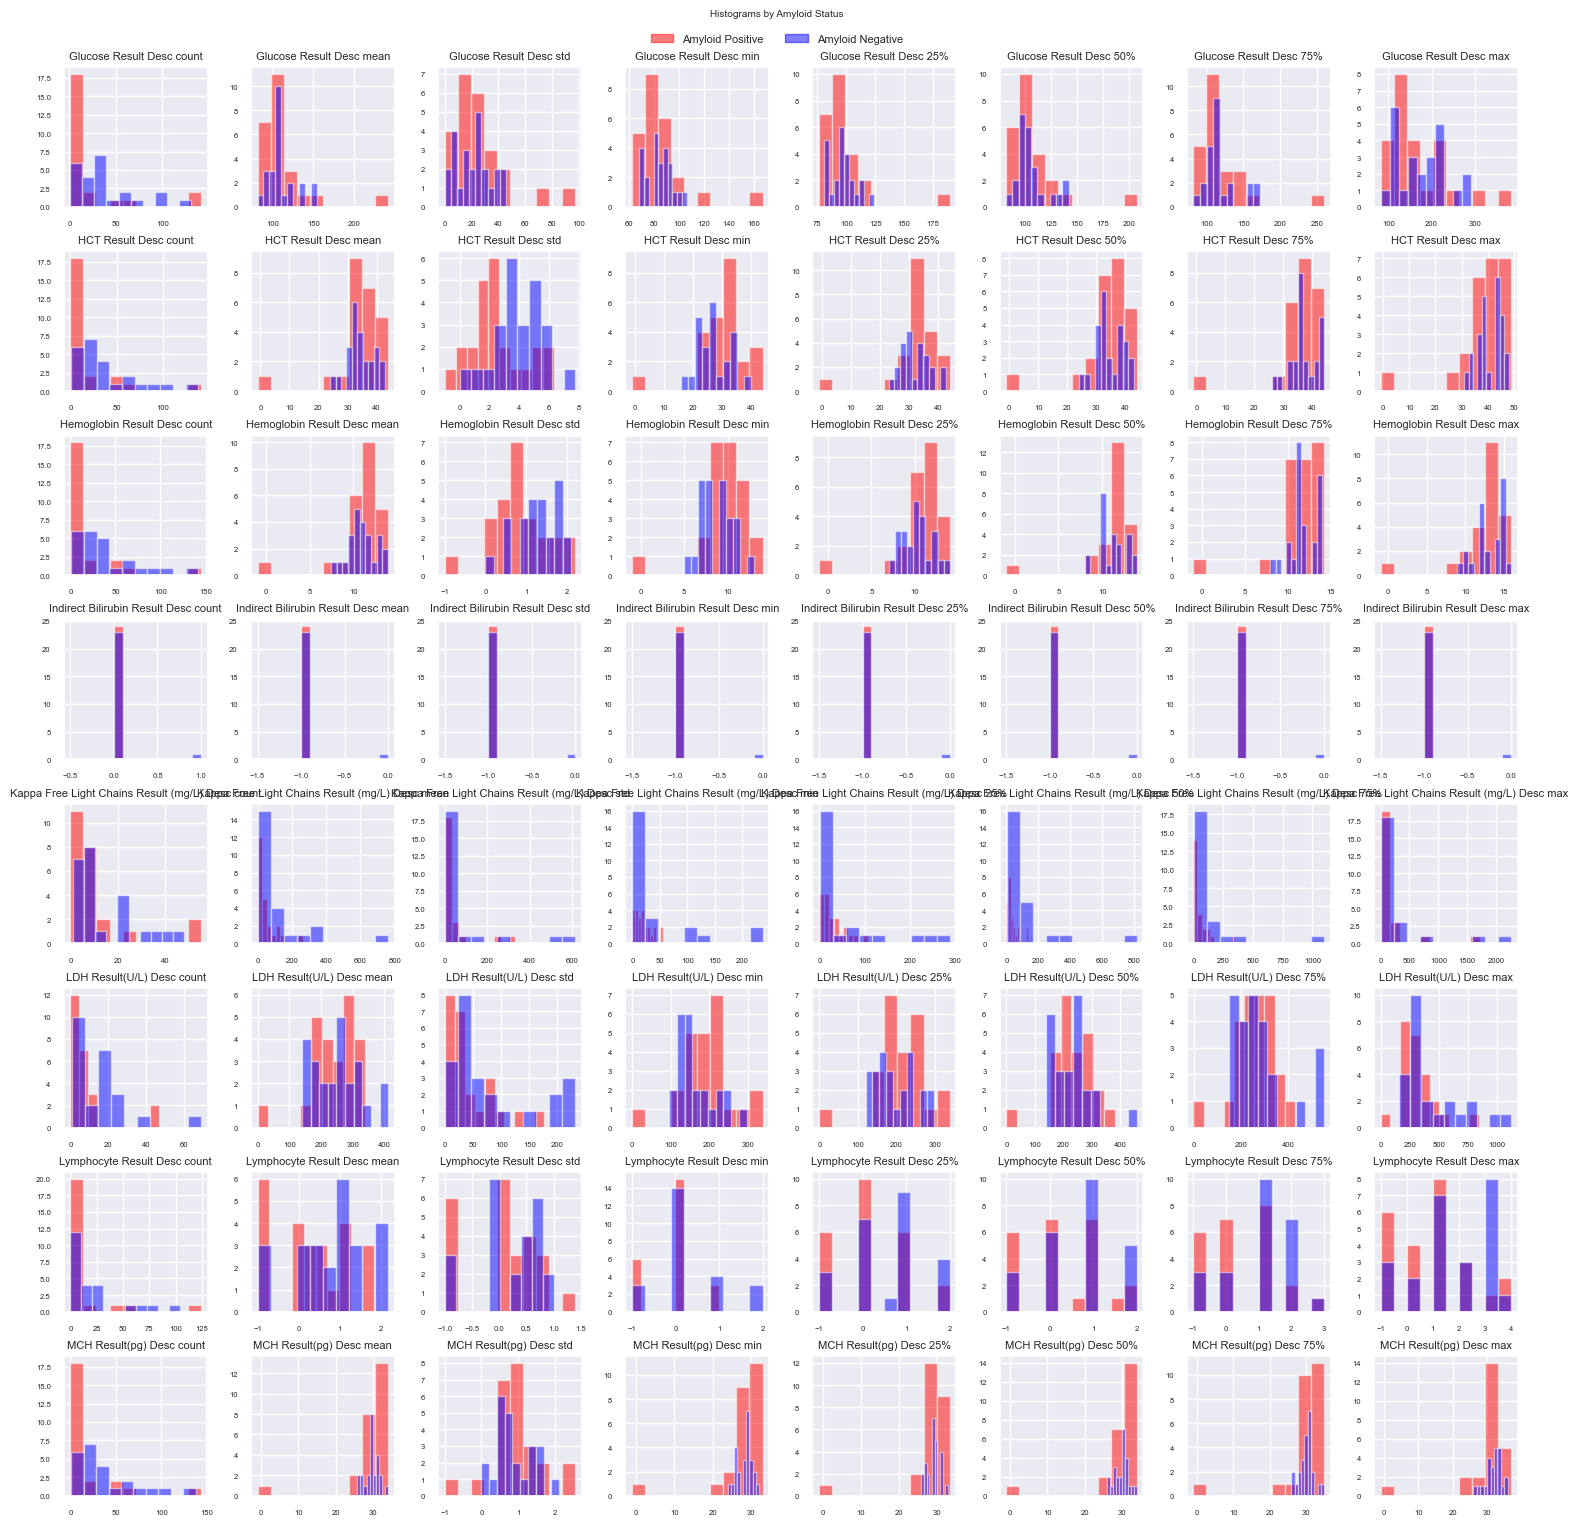

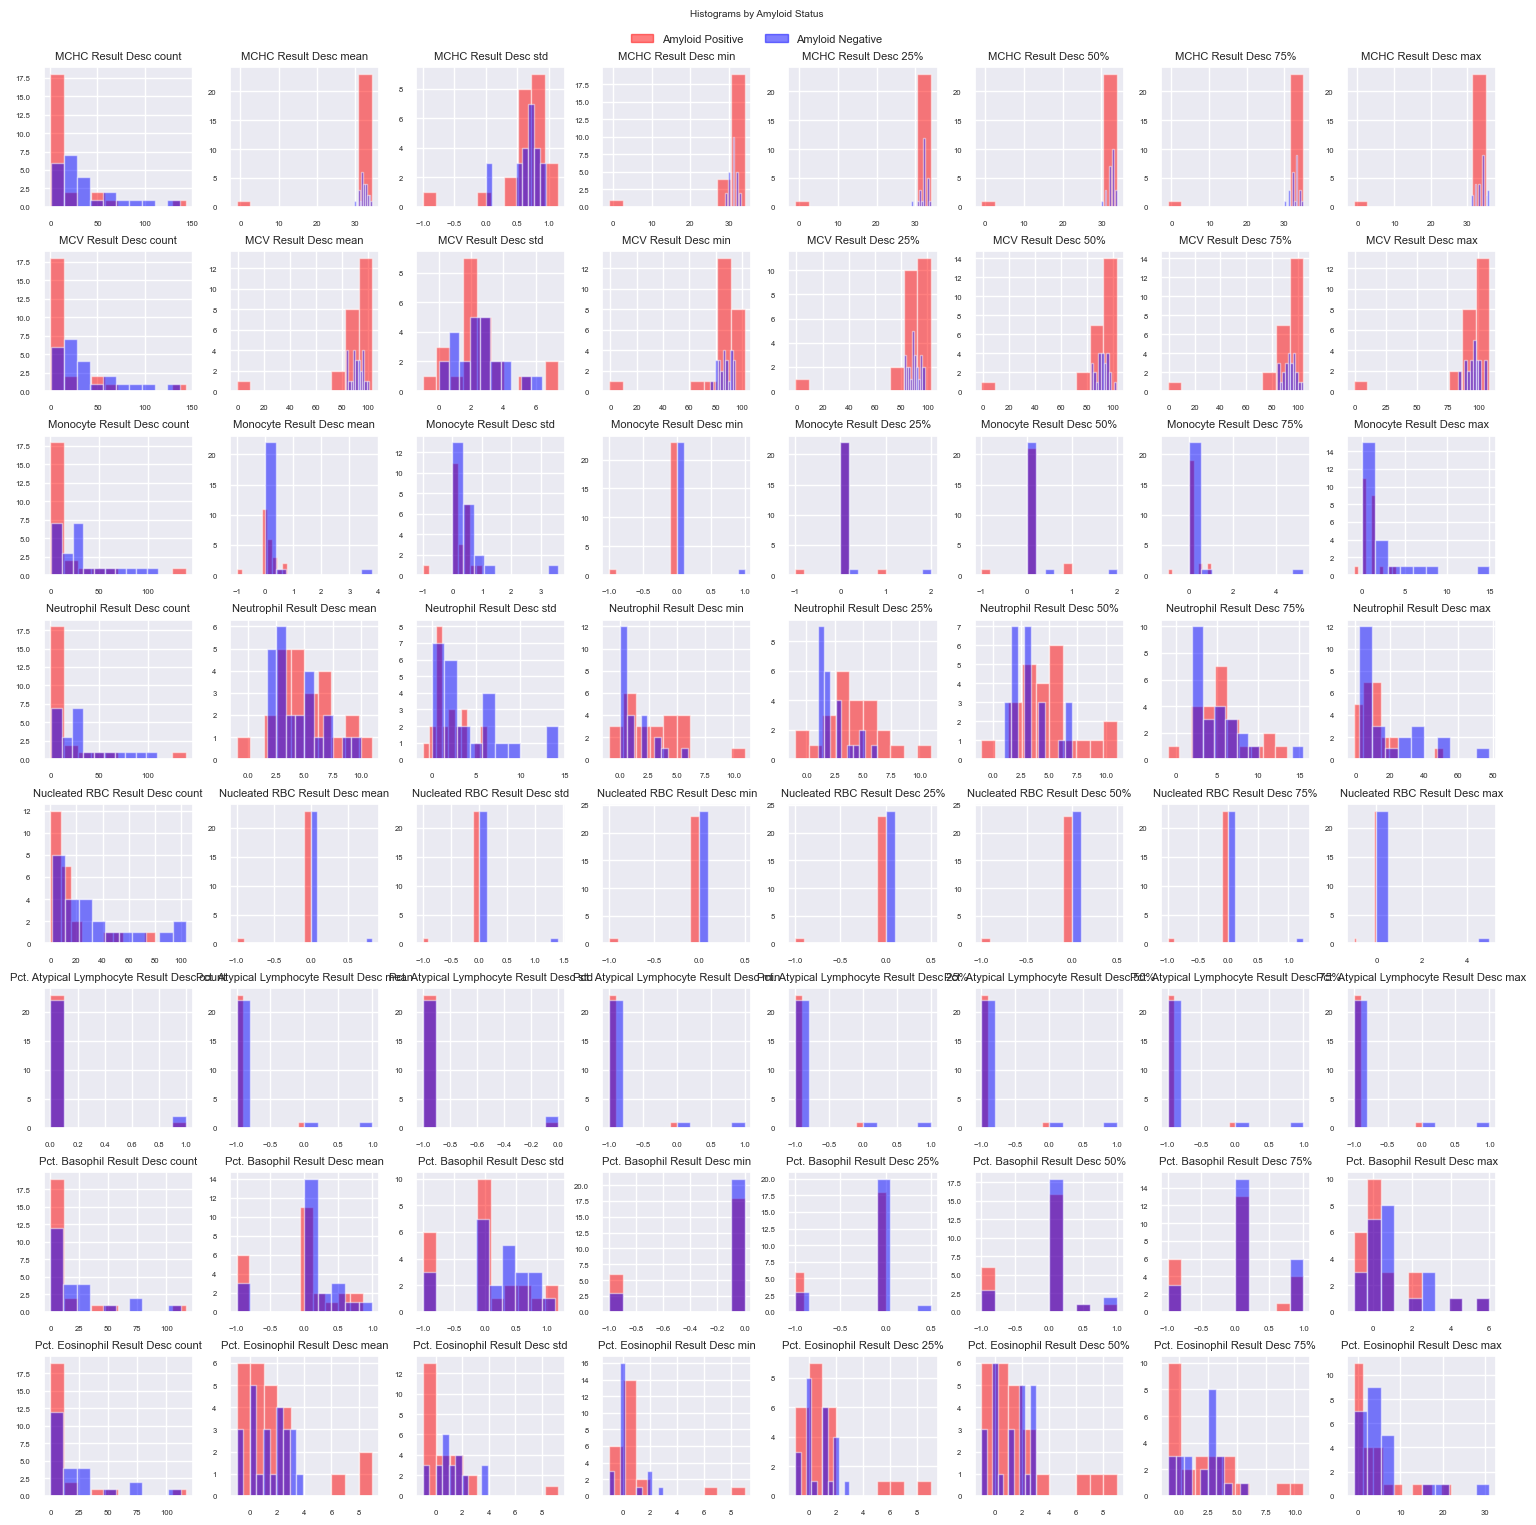

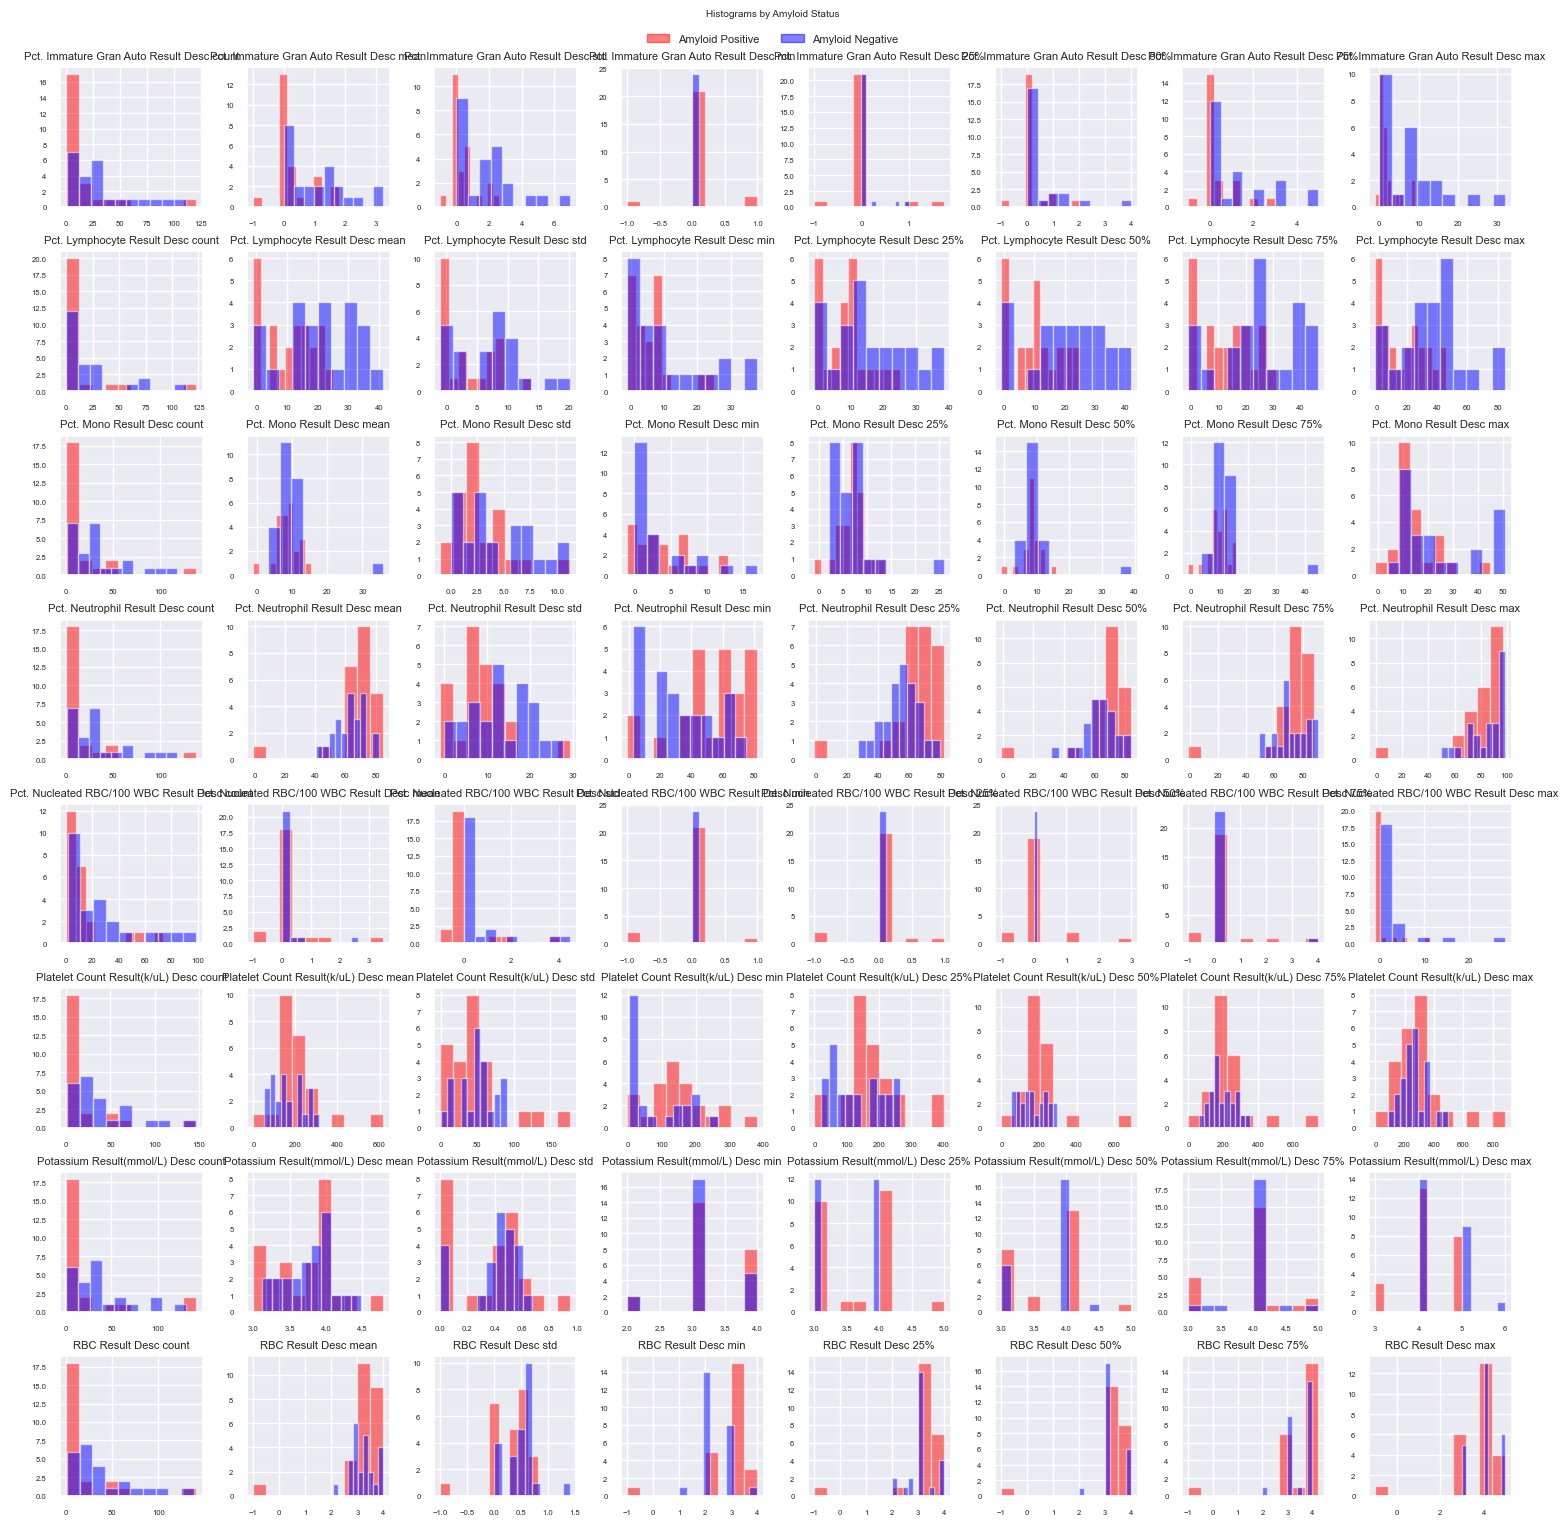

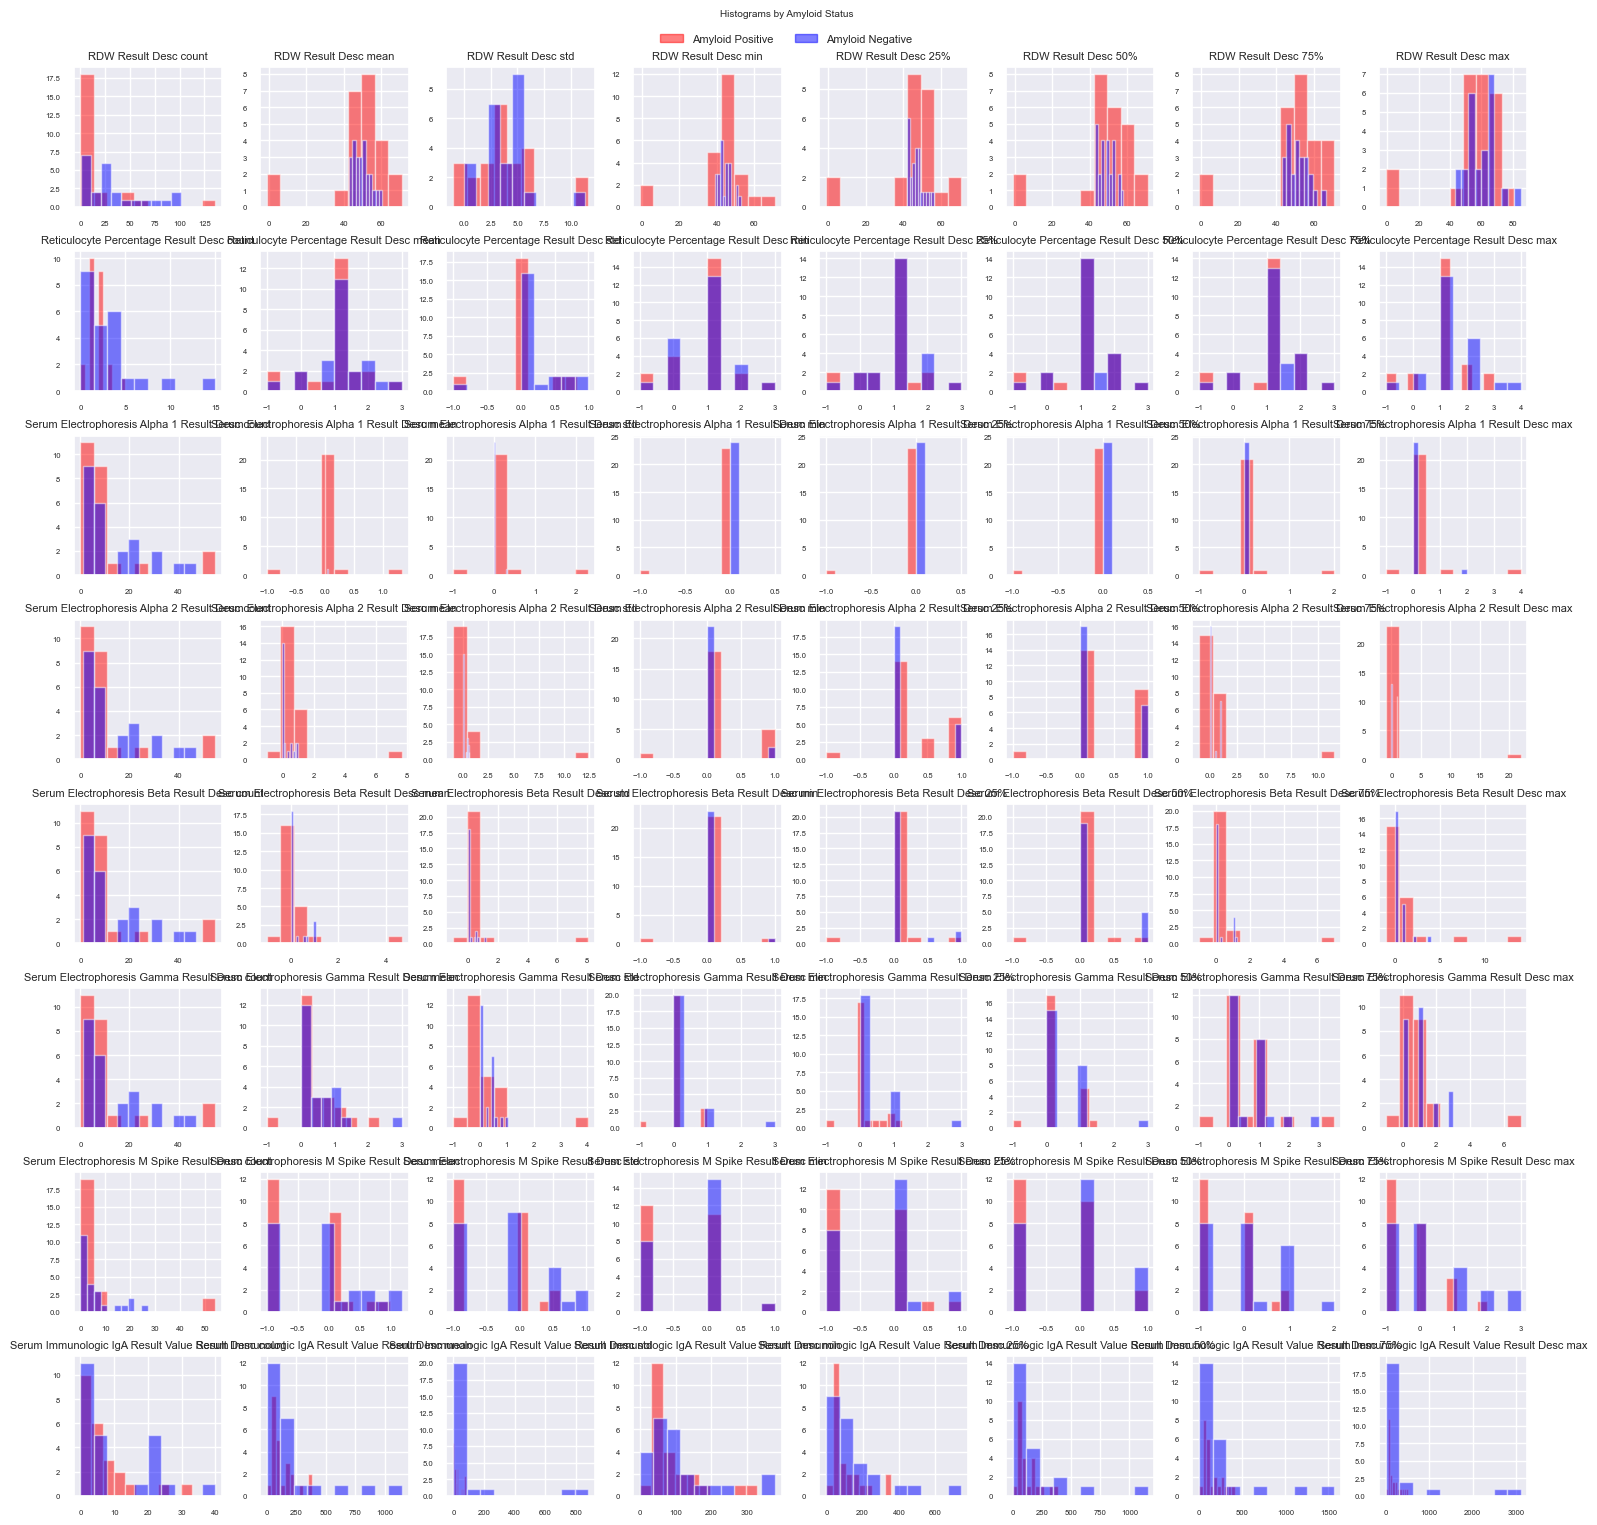

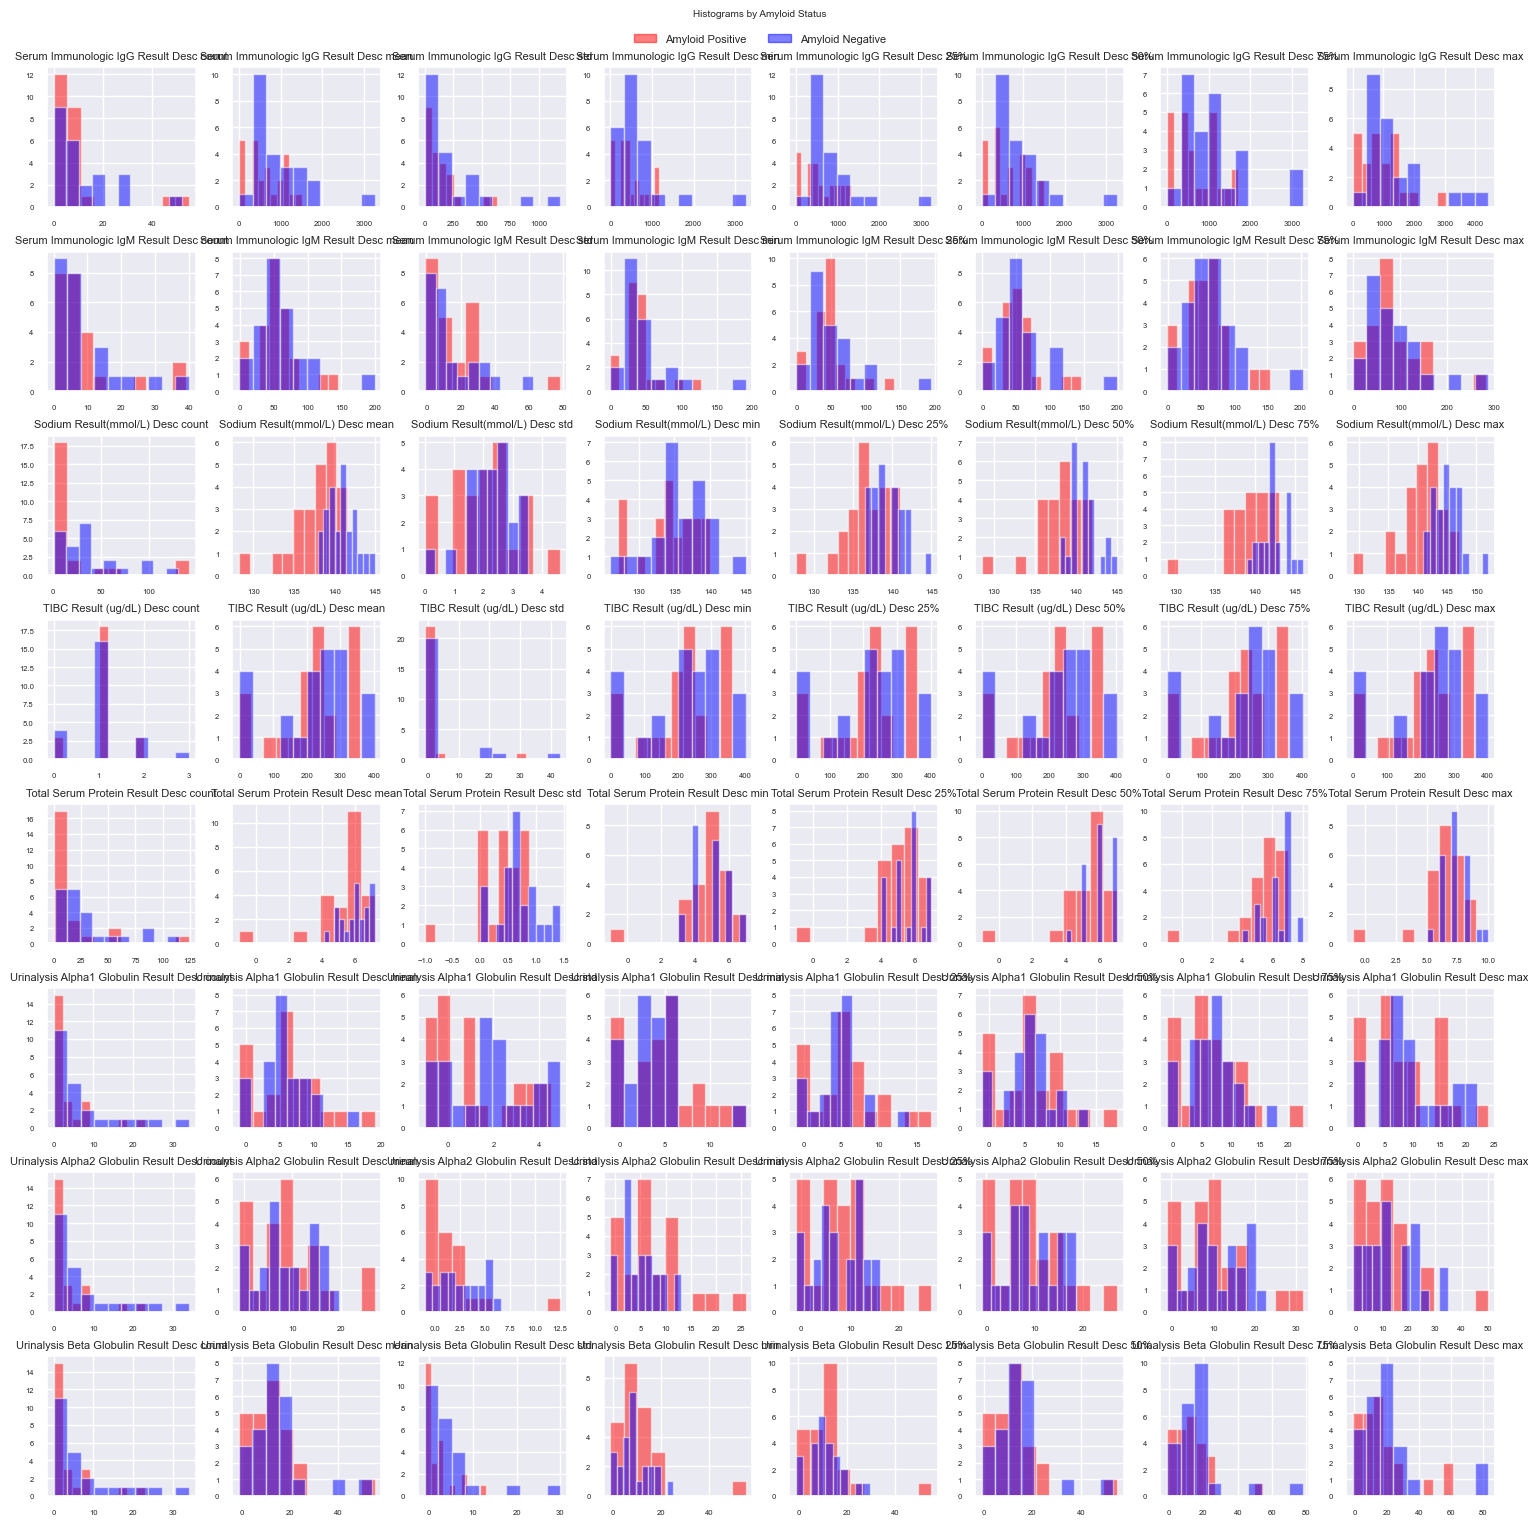

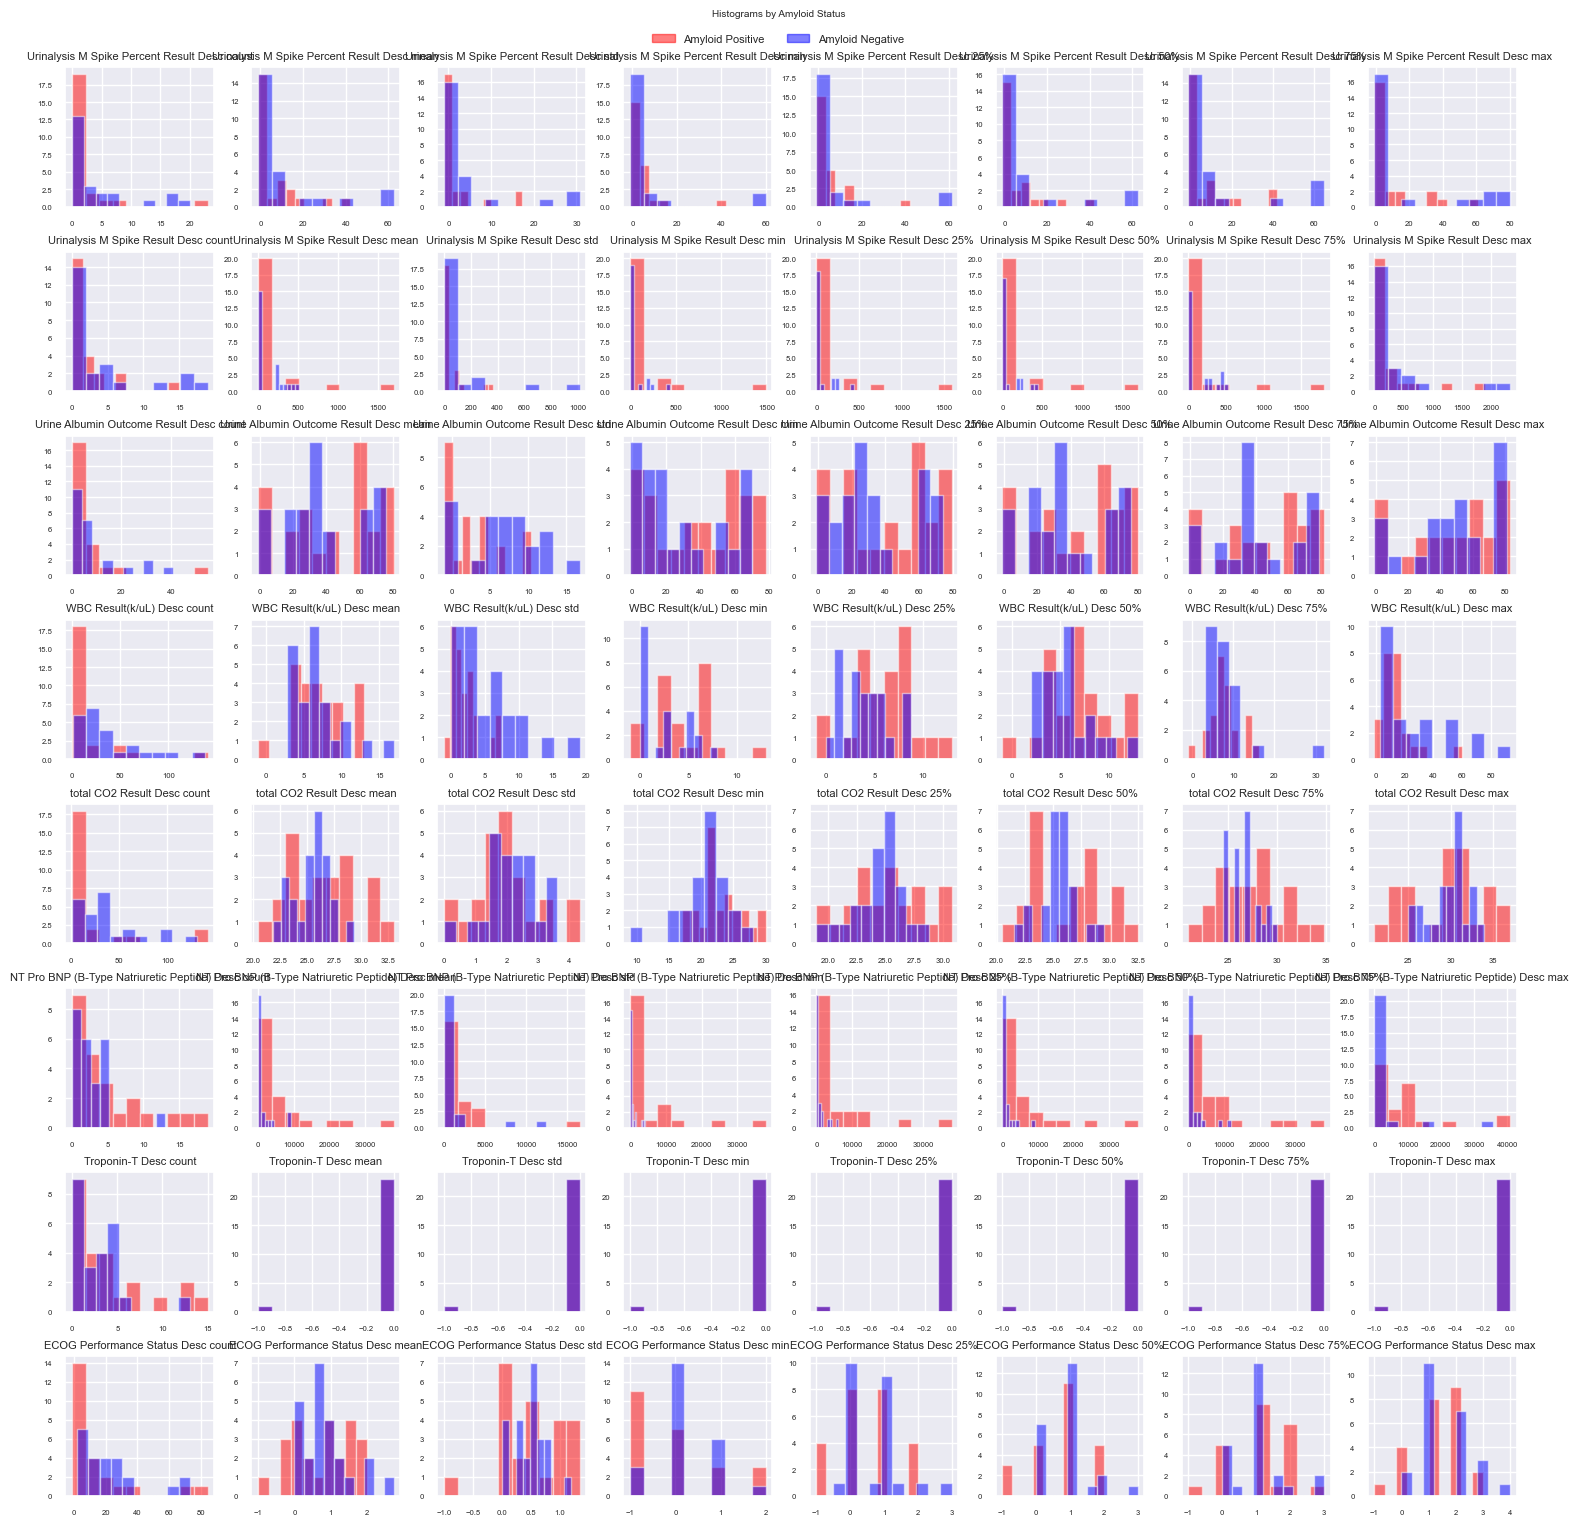

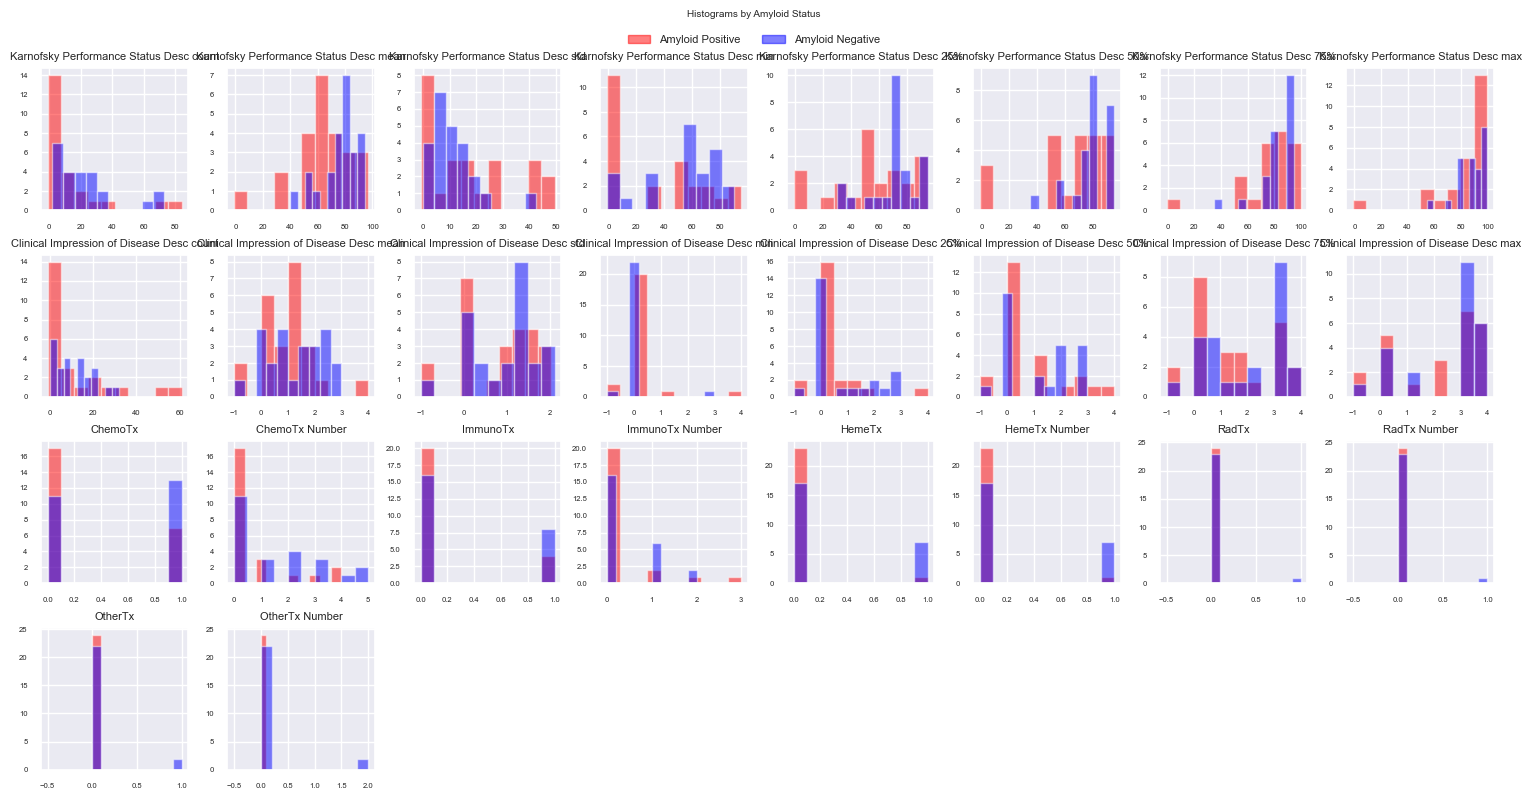

In [176]:
i =0
for slice in slices_sorted:
    fig = plt.figure(figsize= (15,15)) 
    p = 0
    for feature in slice:
        row, col = positions[p]
        ax = plt.subplot2grid((rows_for_fig , cols_for_fig), (row,col))
        ax.hist(model_features_positive[feature], color = color_positive, alpha = alpha)
        ax.hist(model_features_negative[feature], color = color_negative, alpha = alpha)
        ax.set_title(feature, fontsize = 8)

        p = p+1
    fig.suptitle("Histograms by Amyloid Status", y=1.01)
    amyloidpositive_patch = mpatches.Patch(color = color_positive, alpha = alpha, label = "Amyloid Positive")
    amyloidnegative_patch = mpatches.Patch(color = color_negative, alpha = alpha, label = "Amyloid Negative")
    fig.legend(handles = [amyloidpositive_patch, amyloidnegative_patch], loc = 'upper center',
               bbox_to_anchor = (0.5, 1),  ncol = 2, frameon = False, fontsize = 8)
    plt.tight_layout()

    figCommon = fileNameCommon + "_multihist_" + str(i) + "_"
    fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=figCommon, 
                                 fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
    fig.savefig(fig_file_out, bbox_inches = 'tight')

    i = i+1
    # if i == 1:
    #     break

## 2D histograms

In [140]:
#features selected by the model
features_selected = ["Creatinine Result(mg/dL) Desc 25%",
                    "Kappa Free Light Chains Result (mg/L) Desc min", 
                    "Pct. Eosinophil Result Desc 25%",
                    "Pct. Nucleated RBC/100 WBC Result Desc max", 
                    "Sodium Result(mmol/L) Desc 75%",
                    "NT Pro BNP (B-Type Natriuretic Peptide) Desc count"
                    ]

In [141]:

featuresToPlot = features_selected
featuresToPlot.extend(["Amyloid Status"])

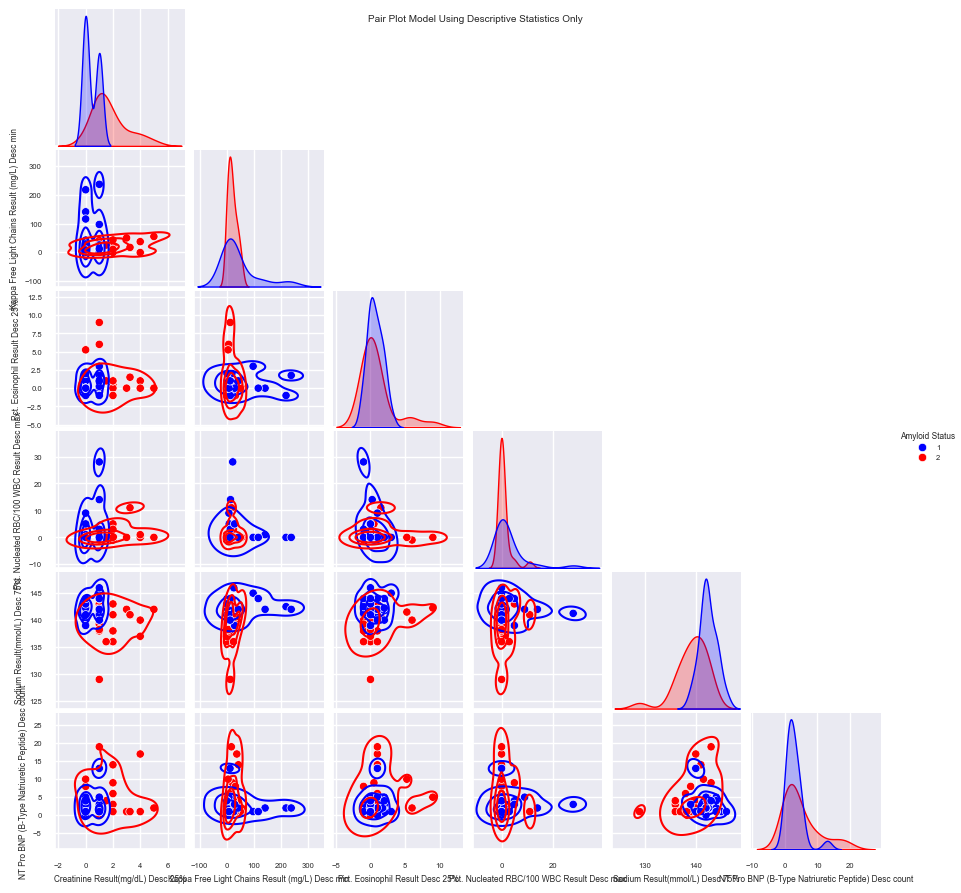

In [173]:
sns.set(font_scale = 0.5)
palette = {2 :'red', 1: 'blue'} #our data is of int64
fig = sns.pairplot(model_features[featuresToPlot],hue= "Amyloid Status", palette=palette, corner=True, height = 1.5)
fig.map_lower(sns.kdeplot, levels = 4)
fig.fig.suptitle("Pair Plot Model Using Descriptive Statistics Only")

figCommon = fileNameCommon + "_pairplot_"
fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=figCommon, 
                                 fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
fig.savefig(fig_file_out, bbox_inches = 'tight')

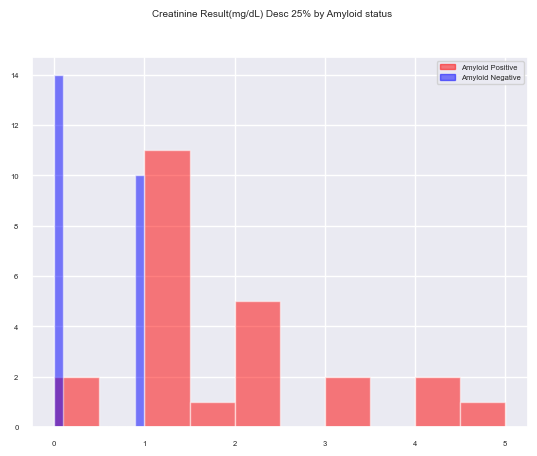

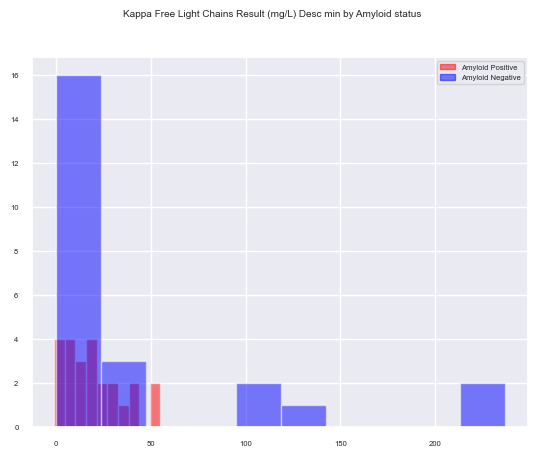

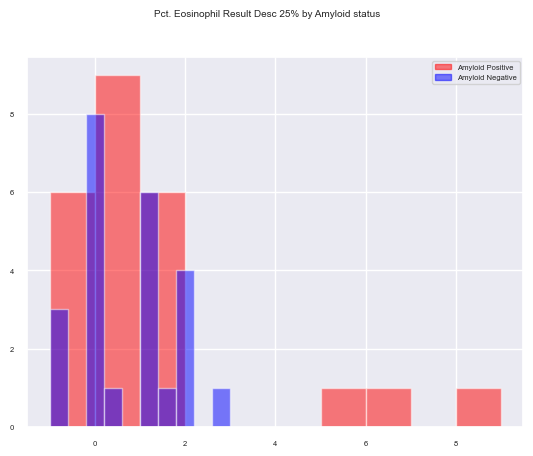

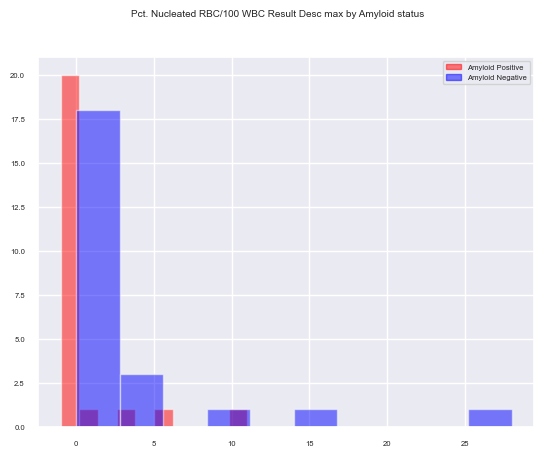

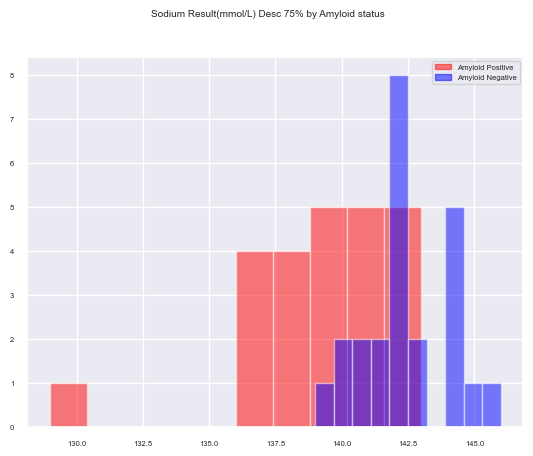

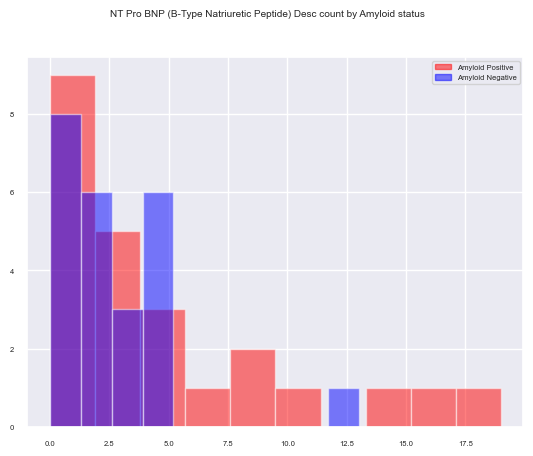

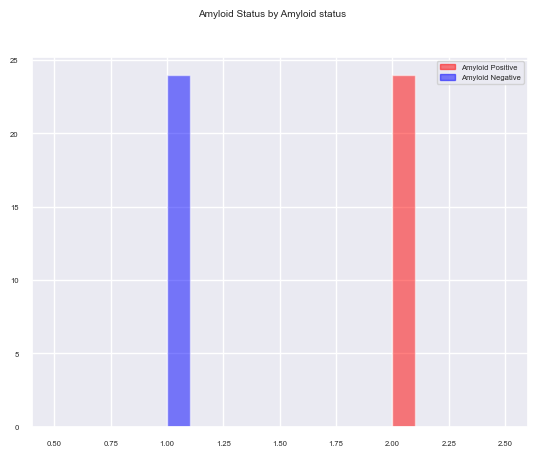

In [175]:
# #Plots histograms
# i = 0
# for feature in features_selected: 
#     fig, ax = plt.subplots()
#     ax.hist(model_features_positive[feature], color = color_positive, alpha = alpha)
#     ax.hist(model_features_negative[feature], color = color_negative, alpha = alpha)
#     amyloidpositive_patch = mpatches.Patch(color = color_positive, alpha = alpha, label = "Amyloid Positive")
#     amyloidnegative_patch = mpatches.Patch(color = color_negative, alpha = alpha, label = "Amyloid Negative")
#     ax.legend(handles = [amyloidpositive_patch, amyloidnegative_patch])
#     fig.suptitle(feature + " by Amyloid status")

#     figCommon = fileNameCommon + "_histo_" + str(i) +"_"
#     fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=figCommon, 
#                                  fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
#     fig.savefig(fig_file_out, bbox_inches = 'tight')
#     i = i+1

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 array([-1.  ,  0.12,  1.24,  2.36,  3.48,  4.6 ,  5.72,  6.84,  7.96,
         9.08, 10.2 , 11.32, 12.44, 13.56, 14.68, 15.8 , 16.92, 18.04,
        19.16, 20.28, 21.4 , 22.52, 23.64, 24.76, 25.88, 27.  , 28.12,
        29.24, 30.36, 31.48, 32.6 , 33.72, 34.84, 35.96, 37.08, 38.2 ,
        39.32, 40.44, 41.56, 42.68, 43.8 , 44.92, 46.04, 47.16, 48.28,
        49.4 , 50.52, 51.64, 52.76, 53.88, 55.  ]),
 <matplotlib.collections.QuadMesh at 0x1b395ba7530>)

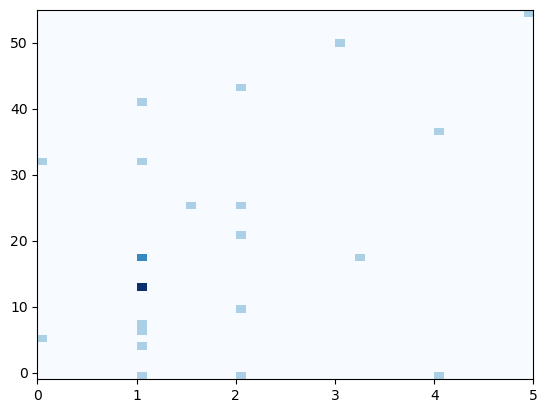

In [127]:
# fig, ax = plt.subplots()
# ax.hist2d(model_features_positive[feature_1], model_features_positive[feature_2], bins = (50,50), cmap = plt.cm.Blues)

# statistics for data used in classifer

code borrowed from AmyloidVsEchoValues

In [ ]:
# #for t test for comparing amyloid positive and negative 
# #final comparisons will be done using graphpad

# ALPostiveData = df_forstats.loc[listPositive]
# ALNegativeData = df_forstats.loc[listNegative]

# dict_imagingValue_stats = {}
# dict_imagingValue_variance_stats = {}
# for imagingValue in echoColumnsOfInterest:
#     #filtering the data to remove the penalty values and missing values
    
#     dataPostive = ALPostiveData.loc[ALPostiveData[imagingValue] > penalty_echo].dropna(axis = 'index')
#     dataNegative = ALNegativeData.loc[ALNegativeData[imagingValue] > penalty_echo].dropna(axis = 'index')

#     #check for variance
#     levene_test = stats.levene(dataPostive[imagingValue], dataNegative[imagingValue], nan_policy="omit")
#     #the brown-forsythe might be more appropriate depending on scewness hense moving to graphpad for final analysis
#     dict_imagingValue_variance_stats[imagingValue] = [levene_test.statistic, levene_test.pvalue]

#     dict_imagingValue_stats[imagingValue] = ttest_ind(dataPostive[imagingValue], dataNegative[imagingValue], equal_var=False)
#     #using equal_var False results in Welch's nonparametric t tests
#     #equality of variance should be checked using Barlett's or Levene's tests and the histograms

# df_imagingValue_stats = pd.DataFrame.from_dict(dict_imagingValue_stats, orient = "index")
# df_imagingValue_variance_stats = pd.DataFrame.from_dict(dict_imagingValue_variance_stats, orient = "index")
# df_imagingValue_variance_stats.columns = ["levene_statistic", "levene_pvalue"]

# df_imagingValue_stats_2 = pd.concat([df_imagingValue_stats,df_imagingValue_variance_stats], axis=1)

# #sort the data by pvalue
# df_imagingValue_stats_2 = df_imagingValue_stats_2.sort_values(by='pvalue', ascending=True)

# outputToExcel(df_data = df_imagingValue_stats_2, fileName_header= fileNameHeader_all, fileName_Common= fileNameCommon + "stats_", fileName_suffix= fileNameSuffix,
#         parent_dir= outputDir, folderName=folderNameOut, sheetName= "Welch-T-test")

# plots for a different set of data